## Titanic Survival Classification using Naive Bayes
---
Dataset downloaded from kaggle: https://www.kaggle.com/datasets/rashigoel/titanic-machine-learning-from-disaster?select=train.csv

In [1]:
#importing libraries
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('~/my_code/applied_ai_notebooks/datasets/titanic_train.csv')
# note: this is my local dir path for dataset

### Lets Explore Data

df.head()

By seeing dataset, we notice that some features are not useful for us to make machine learning model.
lets drop that feature and reduce dimentions on dataset
* PassengerId
* Name
* SibSp
* Parch
* Ticket
* Cabin
* Embarked

In [3]:
df.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked'], axis='columns', inplace=True)

In [4]:
#lets see the data that we are going to use
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


### Handling Null values

In [5]:
# Are there any null values in our data?
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
Fare          0
dtype: int64

We can handle null values by removing that rows or assuming null values.
Here, we are having null data in **Age** column. 

/home/groot/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

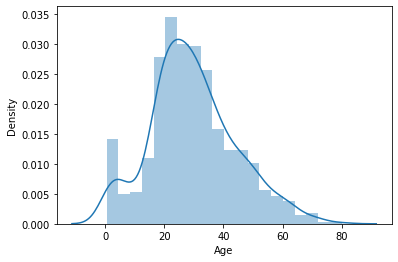

In [6]:
sns.distplot(df.Age)

We will fill null values as **mean** of Age column.

In [7]:
df.Age = df.Age.fillna(df.Age.mean())

In dataset, Sex column contain string data. ML model does not work on text data.
Hence we will convert it into numberical data by creating two columns using **pandas.get_dummies** menthod

In [8]:
dummies = pd.get_dummies(df.Sex)

In [9]:
dummies.head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [10]:
df = pd.concat([df, dummies], axis='columns')
df

,Survived,Pclass,Sex,Age,Fare,female,male
0,0,3,male,22.000000,7.2500,0,1
1,1,1,female,38.000000,71.2833,1,0
2,1,3,female,26.000000,7.9250,1,0
3,1,1,female,35.000000,53.1000,1,0
4,0,3,male,35.000000,8.0500,0,1
...,...,...,...,...,...,...,...
886,0,2,male,27.000000,13.0000,0,1
887,1,1,female,19.000000,30.0000,1,0
888,0,3,female,29.699118,23.4500,1,0
889,1,1,male,26.000000,30.0000,0,1


#### Lets separate our X and Y as inputs and target

In [11]:
target = df.Survived
inputs = df.drop(['Survived', 'Sex'], axis='columns')

In [12]:
target

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [13]:
inputs

,Pclass,Age,Fare,female,male
0,3,22.000000,7.2500,0,1
1,1,38.000000,71.2833,1,0
2,3,26.000000,7.9250,1,0
3,1,35.000000,53.1000,1,0
4,3,35.000000,8.0500,0,1
...,...,...,...,...,...
886,2,27.000000,13.0000,0,1
887,1,19.000000,30.0000,1,0
888,3,29.699118,23.4500,1,0
889,1,26.000000,30.0000,0,1


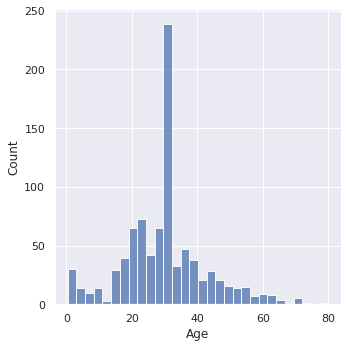

In [14]:
sns.set_theme()
sns.displot(df.Age)

### Start building Model

we will start building model by first splitting our data into train and test datasets

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputs, target, test_size=0.2)

In [16]:
# initialize model
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [17]:
model.fit(X_train, y_train)

GaussianNB()

In [18]:
model.score(X_test, y_test)

0.8044692737430168

In [19]:
model.predict(X_test[:10])

array([0, 1, 0, 1, 0, 0, 0, 1, 0, 1])

In [20]:
y_test[:10]

508    0
710    1
738    0
801    1
439    0
621    1
158    0
866    1
116    0
409    0
Name: Survived, dtype: int64

---
## Conclusion:
* we have created model with 82.6% accuracy.
* we can imporve model preformace by getting more data for training